In [1]:
from Config import *
from Dataset import *
from Experiments import *
from Metric import *
from Model import *
from Utils import *
from FID import *
from Train import *

import gc


class set_args:
    def __init__(self):
        self.seed = 5
        self.state = 'train'
        self.epochs = 150 # training epochs
        self.batch_size = 80
        self.dataset = 'MNIST'#'MNIST'#'CIFAR10' 
        self.split_class= [0]

        #Load different model if TRUE
        self.load_different_model = False
        self.load_training_checkpoint = 30 #30,#200
        self.load_rd_training_checkpoint = 150

        self.sample_dir = 'Result'
        self.checkpoint_dir = 'Result'
        self.M = [0]
        self.I = [0]

        #Reduce training sample
        self.rd = 0.05
        self.training_anchor_num = 5500 #training_anchor_num=200, testing_anchor_num=2500
        self.testing_anchor_num = 10
        

        self.save_weight_dir = 'Result/CheckpointsMNIST/'

        
    
directory_init()

args = set_args()
seed_everything(args.seed) 


"""Merge both these"""
model_config = set_config(args, custom_dataset=args.dataset) 

model, sampler, trainer = model_init(args, model_config)

# FID

block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[2048]
InceptionV3_model = InceptionV3([block_idx])
InceptionV3_model=InceptionV3_model.cuda()



1.13.1
Config : MNIST
Config : haha
loading model : 0_ckpt_30_.pt ......


c:\Users\user\Desktop\DDPM_XAI\Utils.py:799: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
update Sampler ...... done
update Trainer ...... done


c:\Users\user\.conda\envs\FID\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\.conda\envs\FID\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Config : MNIST
Config : haha
loading model : 0_ckpt_30_.pt ......


c:\Users\user\Desktop\DDPM_XAI\Utils.py:799: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
update Sampler ...... done
update Trainer ...... done
Creating anchor dataframe ......
Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h space information and xt in

c:\Users\user\Desktop\DDPM_XAI\Experiments.py:281: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=concat_df, x='label',y='fd_h', hue_order=hue_order, palette=palette, order=hue_order)
c:\Users\user\Desktop\DDPM_XAI\Experiments.py:282: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend to the right
c:\Users\user\Desktop\DDPM_XAI\Experiments.py:290: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=concat_df, x='label',y='fd_ef', hue_order=hue_order, palette=palette, or

experiment 2 Done ......


c:\Users\user\.conda\envs\FID\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\.conda\envs\FID\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training ...... Epoch : 1


100%|██████████| 24/24 [00:05<00:00,  4.22it/s, epoch=1, loss: =177, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 24/24 [00:05<00:00,  4.61it/s, epoch=2, loss: =81.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=3, loss: =20.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 4


100%|██████████| 24/24 [00:05<00:00,  4.63it/s, epoch=4, loss: =10.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 24/24 [00:05<00:00,  4.57it/s, epoch=5, loss: =4.78, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=6, loss: =3.93, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=7, loss: =4.06, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=8, loss: =2.71, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=9, loss: =4.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=10, loss: =3.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=11, loss: =2.14, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=12, loss: =2.46, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=13, loss: =2.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=14, loss: =2.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 15


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=15, loss: =3.76, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=16, loss: =2.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]
c:\Users\user\.conda\envs\FID\lib\site-packages\torch\optim\lr_scheduler.py:1063: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Training ...... Epoch : 17


100%|██████████| 24/24 [00:05<00:00,  4.59it/s, epoch=17, loss: =2.03, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=18, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]   


Training ...... Epoch : 19


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=19, loss: =2.71, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=20, loss: =2.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=21, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 22


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=22, loss: =2.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 24/24 [00:05<00:00,  4.62it/s, epoch=23, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=24, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=25, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=26, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=27, loss: =1.74, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=28, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=29, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=30, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 24/24 [00:05<00:00,  4.63it/s, epoch=31, loss: =2.97, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=32, loss: =2.74, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 24/24 [00:05<00:00,  4.62it/s, epoch=33, loss: =2.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 34


100%|██████████| 24/24 [00:06<00:00,  3.64it/s, epoch=34, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=35, loss: =3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]   


Training ...... Epoch : 36


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=36, loss: =1.99, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=37, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191]


Training ...... Epoch : 38


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=38, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=39, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 40


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=40, loss: =2.23, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189]


Training ...... Epoch : 41


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=41, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=42, loss: =1.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=43, loss: =2.64, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=44, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=45, loss: =1.1, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183] 


Training ...... Epoch : 46


100%|██████████| 24/24 [00:05<00:00,  4.80it/s, epoch=46, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=47, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 48


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=48, loss: =2.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=49, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=50, loss: =2.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=51, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176] 


Training ...... Epoch : 52


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=52, loss: =1.87, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=53, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=54, loss: =2.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=55, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=56, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=57, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 24/24 [00:05<00:00,  4.62it/s, epoch=58, loss: =2.76, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]


Training ...... Epoch : 59


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=59, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=60, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=61, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=62, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 63


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=63, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=64, loss: =1.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=65, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154] 


Training ...... Epoch : 66


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=66, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152] 


Training ...... Epoch : 67


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=67, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015] 


Training ...... Epoch : 68


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=68, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=69, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=70, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144]


Training ...... Epoch : 71


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=71, loss: =1.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143]


Training ...... Epoch : 72


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=72, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=73, loss: =2.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139]


Training ...... Epoch : 74


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=74, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]   


Training ...... Epoch : 75


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=75, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135]  


Training ...... Epoch : 76


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=76, loss: =1.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=77, loss: =1.69, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=78, loss: =1.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129]


Training ...... Epoch : 79


100%|██████████| 24/24 [00:05<00:00,  4.63it/s, epoch=79, loss: =1.16, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=80, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=81, loss: =0.981, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123]


Training ...... Epoch : 82


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=82, loss: =1.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121]


Training ...... Epoch : 83


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=83, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119] 


Training ...... Epoch : 84


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=84, loss: =1.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]  


Training ...... Epoch : 85


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=85, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115] 


Training ...... Epoch : 86


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=86, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113] 


Training ...... Epoch : 87


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=87, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011]


Training ...... Epoch : 88


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=88, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108]


Training ...... Epoch : 89


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=89, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106] 


Training ...... Epoch : 90


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=90, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=91, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102] 


Training ...... Epoch : 92


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=92, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 93


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=93, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=94, loss: =1.07, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5] 


Training ...... Epoch : 95


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=95, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5] 


Training ...... Epoch : 96


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=96, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5] 


Training ...... Epoch : 97


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=97, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5] 


Training ...... Epoch : 98


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=98, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]  


Training ...... Epoch : 99


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=99, loss: =2.3, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5] 


Training ...... Epoch : 100


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=100, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5] 


Training ...... Epoch : 101


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=101, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5] 


Training ...... Epoch : 102


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=102, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5] 


Training ...... Epoch : 103


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=103, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5]


Training ...... Epoch : 104


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=104, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=105, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5] 


Training ...... Epoch : 106


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=106, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5] 


Training ...... Epoch : 107


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=107, loss: =1.08, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5] 


Training ...... Epoch : 108


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=108, loss: =2.44, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5]


Training ...... Epoch : 109


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=109, loss: =1.15, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5] 


Training ...... Epoch : 110


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=110, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5] 


Training ...... Epoch : 111


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=111, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5] 


Training ...... Epoch : 112


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=112, loss: =1.69, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5]


Training ...... Epoch : 113


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=113, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5]  


Training ...... Epoch : 114


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=114, loss: =0.914, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5]


Training ...... Epoch : 115


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=115, loss: =1.29, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5] 


Training ...... Epoch : 116


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=116, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5] 


Training ...... Epoch : 117


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=117, loss: =0.828, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5]


Training ...... Epoch : 118


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=118, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5]


Training ...... Epoch : 119


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=119, loss: =0.811, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]


Training ...... Epoch : 120


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=120, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5]  


Training ...... Epoch : 121


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=121, loss: =1.84, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5] 


Training ...... Epoch : 122


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=122, loss: =1.04, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5] 


Training ...... Epoch : 123


100%|██████████| 24/24 [00:04<00:00,  4.80it/s, epoch=123, loss: =1.13, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5] 


Training ...... Epoch : 124


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=124, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5] 


Training ...... Epoch : 125


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=125, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5] 


Training ...... Epoch : 126


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=126, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5]


Training ...... Epoch : 127


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=127, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5] 


Training ...... Epoch : 128


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=128, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5] 


Training ...... Epoch : 129


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=129, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5] 


Training ...... Epoch : 130


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=130, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5] 


Training ...... Epoch : 131


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=131, loss: =1.1, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5]  


Training ...... Epoch : 132


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=132, loss: =1.26, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5] 


Training ...... Epoch : 133


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=133, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5]  


Training ...... Epoch : 134


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=134, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5] 


Training ...... Epoch : 135


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=135, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5]  


Training ...... Epoch : 136


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=136, loss: =0.968, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5]


Training ...... Epoch : 137


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=137, loss: =1.03, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5] 


Training ...... Epoch : 138


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=138, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5]


Training ...... Epoch : 139


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=139, loss: =0.964, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5]


Training ...... Epoch : 140


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=140, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5] 


Training ...... Epoch : 141


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=141, loss: =1.04, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5]


Training ...... Epoch : 142


100%|██████████| 24/24 [00:05<00:00,  4.63it/s, epoch=142, loss: =0.92, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5] 


Training ...... Epoch : 143


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=143, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5] 


Training ...... Epoch : 144


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=144, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5]


Training ...... Epoch : 145


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=145, loss: =1.14, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5] 


Training ...... Epoch : 146


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=146, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6] 


Training ...... Epoch : 147


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=147, loss: =1.18, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6] 


Training ...... Epoch : 148


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=148, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6] 


Training ...... Epoch : 149


100%|██████████| 24/24 [00:05<00:00,  4.63it/s, epoch=149, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6] 


Training ...... Epoch : 150


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=150, loss: =0.996, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]


Training ...... Epoch : 1


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=1, loss: =182, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=2, loss: =86.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=3, loss: =25.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 4


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=4, loss: =11.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=5, loss: =8.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127] 


Training ...... Epoch : 6


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=6, loss: =6.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=7, loss: =3.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=8, loss: =5.22, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=9, loss: =3.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=10, loss: =3.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=11, loss: =3.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=12, loss: =3.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=13, loss: =2.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=14, loss: =2.3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187] 


Training ...... Epoch : 15


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=15, loss: =2.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=16, loss: =2.16, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=17, loss: =2.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=18, loss: =2.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=19, loss: =2.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=20, loss: =2.46, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=21, loss: =2.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002] 


Training ...... Epoch : 22


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=22, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=23, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=24, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=25, loss: =2.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=26, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=27, loss: =2.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=28, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197] 


Training ...... Epoch : 29


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=29, loss: =1.99, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=30, loss: =3.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=31, loss: =2.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=32, loss: =2.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=33, loss: =2.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 34


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=34, loss: =2.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=35, loss: =2.03, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 36


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=36, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=37, loss: =3.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191]


Training ...... Epoch : 38


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=38, loss: =2.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=39, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019] 


Training ...... Epoch : 40


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=40, loss: =1.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189] 


Training ...... Epoch : 41


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=41, loss: =1.71, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=42, loss: =2.01, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=43, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=44, loss: =2.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=45, loss: =2.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=46, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=47, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 48


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=48, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=49, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=50, loss: =2.06, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=51, loss: =1.78, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176]


Training ...... Epoch : 52


100%|██████████| 24/24 [00:05<00:00,  4.59it/s, epoch=52, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=53, loss: =1.77, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=54, loss: =2.33, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=55, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=56, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=57, loss: =2.38, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 24/24 [00:04<00:00,  4.80it/s, epoch=58, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]


Training ...... Epoch : 59


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=59, loss: =1.97, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=60, loss: =2.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=61, loss: =1.49, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=62, loss: =1.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 63


100%|██████████| 24/24 [00:04<00:00,  4.81it/s, epoch=63, loss: =1.93, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=64, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=65, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154]


Training ...... Epoch : 66


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=66, loss: =1.76, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152]


Training ...... Epoch : 67


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=67, loss: =2.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]


Training ...... Epoch : 68


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=68, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=69, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=70, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144] 


Training ...... Epoch : 71


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=71, loss: =2.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143]


Training ...... Epoch : 72


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=72, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=73, loss: =2.45, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139]


Training ...... Epoch : 74


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=74, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]


Training ...... Epoch : 75


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=75, loss: =1.74, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135]


Training ...... Epoch : 76


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=76, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=77, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=78, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129]


Training ...... Epoch : 79


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=79, loss: =2.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=80, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 24/24 [00:05<00:00,  4.80it/s, epoch=81, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123] 


Training ...... Epoch : 82


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=82, loss: =2.1, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121] 


Training ...... Epoch : 83


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=83, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119]


Training ...... Epoch : 84


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=84, loss: =2.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]


Training ...... Epoch : 85


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=85, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115]


Training ...... Epoch : 86


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=86, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=87, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011]


Training ...... Epoch : 88


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=88, loss: =2.14, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108]


Training ...... Epoch : 89


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=89, loss: =2.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106]


Training ...... Epoch : 90


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=90, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=91, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102] 


Training ...... Epoch : 92


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=92, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 93


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=93, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=94, loss: =2.19, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5]


Training ...... Epoch : 95


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=95, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5]


Training ...... Epoch : 96


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=96, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5]


Training ...... Epoch : 97


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=97, loss: =1.98, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5]


Training ...... Epoch : 98


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=98, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]


Training ...... Epoch : 99


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=99, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5]


Training ...... Epoch : 100


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=100, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5]


Training ...... Epoch : 101


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=101, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5]


Training ...... Epoch : 102


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=102, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5]


Training ...... Epoch : 103


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=103, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5]


Training ...... Epoch : 104


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=104, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=105, loss: =2.62, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5] 


Training ...... Epoch : 106


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=106, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]


Training ...... Epoch : 107


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=107, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5]


Training ...... Epoch : 108


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=108, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5]


Training ...... Epoch : 109


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=109, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5] 


Training ...... Epoch : 110


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=110, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5]


Training ...... Epoch : 111


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=111, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5]


Training ...... Epoch : 112


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=112, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5]


Training ...... Epoch : 113


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=113, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5]


Training ...... Epoch : 114


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=114, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5] 


Training ...... Epoch : 115


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=115, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5] 


Training ...... Epoch : 116


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=116, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5]


Training ...... Epoch : 117


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=117, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5] 


Training ...... Epoch : 118


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=118, loss: =0.902, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5]


Training ...... Epoch : 119


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=119, loss: =1.15, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]


Training ...... Epoch : 120


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=120, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5] 


Training ...... Epoch : 121


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=121, loss: =1.9, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5] 


Training ...... Epoch : 122


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=122, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5]


Training ...... Epoch : 123


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=123, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5]


Training ...... Epoch : 124


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=124, loss: =1.09, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5] 


Training ...... Epoch : 125


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=125, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5]


Training ...... Epoch : 126


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=126, loss: =1.46, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5]


Training ...... Epoch : 127


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=127, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5]


Training ...... Epoch : 128


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=128, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5]


Training ...... Epoch : 129


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=129, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5]


Training ...... Epoch : 130


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=130, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5] 


Training ...... Epoch : 131


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=131, loss: =2.36, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5]


Training ...... Epoch : 132


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=132, loss: =1.68, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5] 


Training ...... Epoch : 133


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=133, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5]


Training ...... Epoch : 134


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=134, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5] 


Training ...... Epoch : 135


100%|██████████| 24/24 [00:05<00:00,  4.62it/s, epoch=135, loss: =1.08, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5]


Training ...... Epoch : 136


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=136, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5] 


Training ...... Epoch : 137


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=137, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5]


Training ...... Epoch : 138


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=138, loss: =2.04, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5]


Training ...... Epoch : 139


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=139, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5] 


Training ...... Epoch : 140


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=140, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5]


Training ...... Epoch : 141


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=141, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5] 


Training ...... Epoch : 142


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=142, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5]


Training ...... Epoch : 143


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=143, loss: =1.56, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5] 


Training ...... Epoch : 144


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=144, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5]


Training ...... Epoch : 145


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=145, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5] 


Training ...... Epoch : 146


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=146, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6]


Training ...... Epoch : 147


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=147, loss: =1.14, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6]


Training ...... Epoch : 148


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=148, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6] 


Training ...... Epoch : 149


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=149, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6]


Training ...... Epoch : 150


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=150, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6] 


Training ...... Epoch : 1


100%|██████████| 24/24 [00:05<00:00,  4.59it/s, epoch=1, loss: =180, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=2, loss: =82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]  


Training ...... Epoch : 3


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=3, loss: =24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]  


Training ...... Epoch : 4


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=4, loss: =9.28, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=5, loss: =5.45, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=6, loss: =5.81, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=7, loss: =4.31, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=8, loss: =4.01, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=9, loss: =3.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=10, loss: =3.16, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=11, loss: =2.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=12, loss: =2.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=13, loss: =2.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018] 


Training ...... Epoch : 14


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=14, loss: =4.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 15


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=15, loss: =3.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=16, loss: =2.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=17, loss: =2.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 24/24 [00:05<00:00,  4.80it/s, epoch=18, loss: =2.64, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=19, loss: =2.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=20, loss: =2.28, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=21, loss: =2.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 22


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=22, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=23, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=24, loss: =2.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=25, loss: =2.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=26, loss: =2.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=27, loss: =1.87, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=28, loss: =2.04, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=29, loss: =1.84, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=30, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=31, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=32, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=33, loss: =2.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194] 


Training ...... Epoch : 34


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=34, loss: =2.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=35, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 36


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=36, loss: =2.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=37, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191]


Training ...... Epoch : 38


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=38, loss: =2.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=39, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019] 


Training ...... Epoch : 40


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=40, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189] 


Training ...... Epoch : 41


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=41, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 24/24 [00:05<00:00,  4.59it/s, epoch=42, loss: =2.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=43, loss: =2.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=44, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=45, loss: =2.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=46, loss: =2.68, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=47, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 48


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=48, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=49, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=50, loss: =1.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=51, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176]


Training ...... Epoch : 52


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=52, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=53, loss: =2.84, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 24/24 [00:05<00:00,  4.80it/s, epoch=54, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=55, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=56, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=57, loss: =1.77, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=58, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]


Training ...... Epoch : 59


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=59, loss: =1.71, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 24/24 [00:05<00:00,  4.76it/s, epoch=60, loss: =1.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=61, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=62, loss: =1.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 63


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=63, loss: =1.16, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=64, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=65, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154] 


Training ...... Epoch : 66


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=66, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152]


Training ...... Epoch : 67


100%|██████████| 24/24 [00:05<00:00,  4.62it/s, epoch=67, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]


Training ...... Epoch : 68


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=68, loss: =2.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=69, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146] 


Training ...... Epoch : 70


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=70, loss: =2.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144] 


Training ...... Epoch : 71


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=71, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143] 


Training ...... Epoch : 72


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=72, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=73, loss: =1.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139] 


Training ...... Epoch : 74


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=74, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]


Training ...... Epoch : 75


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=75, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135]


Training ...... Epoch : 76


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=76, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=77, loss: =1.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=78, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129]


Training ...... Epoch : 79


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=79, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=80, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=81, loss: =1.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123]


Training ...... Epoch : 82


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=82, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121]


Training ...... Epoch : 83


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=83, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119] 


Training ...... Epoch : 84


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=84, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]


Training ...... Epoch : 85


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=85, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115]


Training ...... Epoch : 86


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=86, loss: =1.87, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=87, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011]


Training ...... Epoch : 88


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=88, loss: =2.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108]


Training ...... Epoch : 89


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=89, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106]


Training ...... Epoch : 90


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=90, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=91, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102]


Training ...... Epoch : 92


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=92, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 93


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=93, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=94, loss: =2.17, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5] 


Training ...... Epoch : 95


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=95, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5]  


Training ...... Epoch : 96


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=96, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5]


Training ...... Epoch : 97


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=97, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5]


Training ...... Epoch : 98


100%|██████████| 24/24 [00:05<00:00,  4.79it/s, epoch=98, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]


Training ...... Epoch : 99


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=99, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5]


Training ...... Epoch : 100


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=100, loss: =1.71, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5]


Training ...... Epoch : 101


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=101, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5]


Training ...... Epoch : 102


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=102, loss: =1.18, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5]


Training ...... Epoch : 103


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=103, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5]


Training ...... Epoch : 104


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=104, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=105, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5]    


Training ...... Epoch : 106


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=106, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]


Training ...... Epoch : 107


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=107, loss: =1.8, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5] 


Training ...... Epoch : 108


100%|██████████| 24/24 [00:05<00:00,  4.66it/s, epoch=108, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5]


Training ...... Epoch : 109


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=109, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5]


Training ...... Epoch : 110


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=110, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5] 


Training ...... Epoch : 111


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=111, loss: =1.79, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5] 


Training ...... Epoch : 112


100%|██████████| 24/24 [00:05<00:00,  4.65it/s, epoch=112, loss: =1.1, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5]  


Training ...... Epoch : 113


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=113, loss: =0.726, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5]


Training ...... Epoch : 114


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=114, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5] 


Training ...... Epoch : 115


100%|██████████| 24/24 [00:05<00:00,  4.64it/s, epoch=115, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5] 


Training ...... Epoch : 116


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=116, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5]


Training ...... Epoch : 117


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=117, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5]


Training ...... Epoch : 118


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=118, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5]


Training ...... Epoch : 119


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=119, loss: =1.68, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]


Training ...... Epoch : 120


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=120, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5]


Training ...... Epoch : 121


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=121, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5] 


Training ...... Epoch : 122


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=122, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5] 


Training ...... Epoch : 123


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=123, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5]


Training ...... Epoch : 124


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=124, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5]


Training ...... Epoch : 125


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=125, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5]


Training ...... Epoch : 126


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=126, loss: =1.98, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5]


Training ...... Epoch : 127


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=127, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5]


Training ...... Epoch : 128


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=128, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5]


Training ...... Epoch : 129


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=129, loss: =1.49, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5] 


Training ...... Epoch : 130


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=130, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5]


Training ...... Epoch : 131


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=131, loss: =1.02, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5] 


Training ...... Epoch : 132


100%|██████████| 24/24 [00:05<00:00,  4.78it/s, epoch=132, loss: =1.13, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5]


Training ...... Epoch : 133


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=133, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5]


Training ...... Epoch : 134


100%|██████████| 24/24 [00:05<00:00,  4.75it/s, epoch=134, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5] 


Training ...... Epoch : 135


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=135, loss: =1.49, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5] 


Training ...... Epoch : 136


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=136, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5] 


Training ...... Epoch : 137


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=137, loss: =0.907, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5]


Training ...... Epoch : 138


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=138, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5]


Training ...... Epoch : 139


100%|██████████| 24/24 [00:05<00:00,  4.70it/s, epoch=139, loss: =1.04, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5] 


Training ...... Epoch : 140


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=140, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5]


Training ...... Epoch : 141


100%|██████████| 24/24 [00:05<00:00,  4.69it/s, epoch=141, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5] 


Training ...... Epoch : 142


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=142, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5] 


Training ...... Epoch : 143


100%|██████████| 24/24 [00:05<00:00,  4.67it/s, epoch=143, loss: =0.815, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5]


Training ...... Epoch : 144


100%|██████████| 24/24 [00:05<00:00,  4.74it/s, epoch=144, loss: =1.29, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5]


Training ...... Epoch : 145


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=145, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5] 


Training ...... Epoch : 146


100%|██████████| 24/24 [00:05<00:00,  4.72it/s, epoch=146, loss: =1.3, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6] 


Training ...... Epoch : 147


100%|██████████| 24/24 [00:05<00:00,  4.77it/s, epoch=147, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6] 


Training ...... Epoch : 148


100%|██████████| 24/24 [00:05<00:00,  4.71it/s, epoch=148, loss: =1.08, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6] 


Training ...... Epoch : 149


100%|██████████| 24/24 [00:05<00:00,  4.73it/s, epoch=149, loss: =1.73, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6] 


Training ...... Epoch : 150


100%|██████████| 24/24 [00:05<00:00,  4.68it/s, epoch=150, loss: =1, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]   


Training ...... Epoch : 1


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=1, loss: =184, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=2, loss: =90.2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=3, loss: =28.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 4


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=4, loss: =11.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=5, loss: =6.23, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=6, loss: =3.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=7, loss: =5.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014] 


Training ...... Epoch : 8


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=8, loss: =3.77, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=9, loss: =4.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=10, loss: =2.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=11, loss: =2.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=12, loss: =2.28, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=13, loss: =2.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=14, loss: =2.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 15


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=15, loss: =2.71, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=16, loss: =2.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=17, loss: =2.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=18, loss: =3.84, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=19, loss: =1.97, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=20, loss: =2.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=21, loss: =2.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 22


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=22, loss: =2.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=23, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=24, loss: =2.22, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=25, loss: =3.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=26, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=27, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=28, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=29, loss: =2.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=30, loss: =1.87, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=31, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=32, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=33, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194] 


Training ...... Epoch : 34


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=34, loss: =1.77, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=35, loss: =2.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 36


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=36, loss: =2.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=37, loss: =2.1, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191] 


Training ...... Epoch : 38


100%|██████████| 23/23 [00:05<00:00,  4.56it/s, epoch=38, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=39, loss: =1.84, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 40


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=40, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189]


Training ...... Epoch : 41


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=41, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188] 


Training ...... Epoch : 42


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=42, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=43, loss: =2.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=44, loss: =2.06, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=45, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=46, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=47, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181] 


Training ...... Epoch : 48


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=48, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=49, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=50, loss: =1.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=51, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176] 


Training ...... Epoch : 52


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=52, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=53, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 23/23 [00:05<00:00,  4.56it/s, epoch=54, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=55, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=56, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=57, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=58, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165] 


Training ...... Epoch : 59


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=59, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=60, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=61, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=62, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 63


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=63, loss: =2.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=64, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155] 


Training ...... Epoch : 65


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=65, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154] 


Training ...... Epoch : 66


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=66, loss: =2.04, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152]


Training ...... Epoch : 67


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=67, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]


Training ...... Epoch : 68


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=68, loss: =1.74, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=69, loss: =1.29, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=70, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144] 


Training ...... Epoch : 71


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=71, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143]


Training ...... Epoch : 72


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=72, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141] 


Training ...... Epoch : 73


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=73, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139]


Training ...... Epoch : 74


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=74, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]


Training ...... Epoch : 75


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=75, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135] 


Training ...... Epoch : 76


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=76, loss: =1.3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133] 


Training ...... Epoch : 77


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=77, loss: =1.46, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=78, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129] 


Training ...... Epoch : 79


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=79, loss: =1.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=80, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=81, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123] 


Training ...... Epoch : 82


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=82, loss: =1.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121] 


Training ...... Epoch : 83


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=83, loss: =1.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119]


Training ...... Epoch : 84


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=84, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117] 


Training ...... Epoch : 85


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=85, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115] 


Training ...... Epoch : 86


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=86, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=87, loss: =1.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011] 


Training ...... Epoch : 88


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=88, loss: =1.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108]


Training ...... Epoch : 89


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=89, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106]


Training ...... Epoch : 90


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=90, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104] 


Training ...... Epoch : 91


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=91, loss: =1.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102] 


Training ...... Epoch : 92


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=92, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]  


Training ...... Epoch : 93


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=93, loss: =1.06, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=94, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5]


Training ...... Epoch : 95


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=95, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5] 


Training ...... Epoch : 96


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=96, loss: =1.8, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5] 


Training ...... Epoch : 97


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=97, loss: =1.1, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5] 


Training ...... Epoch : 98


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=98, loss: =1.04, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5] 


Training ...... Epoch : 99


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=99, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5] 


Training ...... Epoch : 100


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=100, loss: =1.49, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5] 


Training ...... Epoch : 101


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=101, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5] 


Training ...... Epoch : 102


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=102, loss: =0.924, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5]


Training ...... Epoch : 103


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=103, loss: =1.3, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5]  


Training ...... Epoch : 104


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=104, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=105, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5]


Training ...... Epoch : 106


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=106, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]  


Training ...... Epoch : 107


100%|██████████| 23/23 [00:04<00:00,  4.71it/s, epoch=107, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5] 


Training ...... Epoch : 108


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=108, loss: =1.26, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5] 


Training ...... Epoch : 109


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=109, loss: =1.06, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5] 


Training ...... Epoch : 110


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=110, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5] 


Training ...... Epoch : 111


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=111, loss: =0.77, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5]


Training ...... Epoch : 112


100%|██████████| 23/23 [00:04<00:00,  4.68it/s, epoch=112, loss: =1.26, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5] 


Training ...... Epoch : 113


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=113, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5] 


Training ...... Epoch : 114


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=114, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5]


Training ...... Epoch : 115


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=115, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5]


Training ...... Epoch : 116


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=116, loss: =1.01, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5] 


Training ...... Epoch : 117


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=117, loss: =1.15, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5] 


Training ...... Epoch : 118


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=118, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5] 


Training ...... Epoch : 119


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=119, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5] 


Training ...... Epoch : 120


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=120, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5]


Training ...... Epoch : 121


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=121, loss: =0.767, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5]


Training ...... Epoch : 122


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=122, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5] 


Training ...... Epoch : 123


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=123, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5]


Training ...... Epoch : 124


100%|██████████| 23/23 [00:05<00:00,  4.52it/s, epoch=124, loss: =1.14, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5] 


Training ...... Epoch : 125


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=125, loss: =1.04, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5] 


Training ...... Epoch : 126


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=126, loss: =1.56, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5] 


Training ...... Epoch : 127


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=127, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5]


Training ...... Epoch : 128


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=128, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5] 


Training ...... Epoch : 129


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=129, loss: =0.891, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5]


Training ...... Epoch : 130


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=130, loss: =0.978, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5]


Training ...... Epoch : 131


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=131, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5] 


Training ...... Epoch : 132


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=132, loss: =1.08, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5] 


Training ...... Epoch : 133


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=133, loss: =1.29, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5] 


Training ...... Epoch : 134


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=134, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5]


Training ...... Epoch : 135


100%|██████████| 23/23 [00:05<00:00,  4.55it/s, epoch=135, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5] 


Training ...... Epoch : 136


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=136, loss: =0.867, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5]


Training ...... Epoch : 137


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=137, loss: =1.03, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5] 


Training ...... Epoch : 138


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=138, loss: =0.696, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5]


Training ...... Epoch : 139


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=139, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5] 


Training ...... Epoch : 140


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=140, loss: =1.01, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5] 


Training ...... Epoch : 141


100%|██████████| 23/23 [00:05<00:00,  4.56it/s, epoch=141, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5]  


Training ...... Epoch : 142


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=142, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5] 


Training ...... Epoch : 143


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=143, loss: =0.901, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5]


Training ...... Epoch : 144


100%|██████████| 23/23 [00:05<00:00,  4.56it/s, epoch=144, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5] 


Training ...... Epoch : 145


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=145, loss: =0.854, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5]


Training ...... Epoch : 146


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=146, loss: =1.15, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6] 


Training ...... Epoch : 147


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=147, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6] 


Training ...... Epoch : 148


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=148, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6]


Training ...... Epoch : 149


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=149, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6] 


Training ...... Epoch : 150


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=150, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]  


Training ...... Epoch : 1


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=1, loss: =182, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=2, loss: =93.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=3, loss: =27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]  


Training ...... Epoch : 4


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=4, loss: =9.69, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=5, loss: =5.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=6, loss: =4.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=7, loss: =2.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=8, loss: =3.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=9, loss: =4.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=10, loss: =3.06, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=11, loss: =3.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=12, loss: =2.68, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=13, loss: =2.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=14, loss: =2.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187] 


Training ...... Epoch : 15


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=15, loss: =3.09, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=16, loss: =2.14, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=17, loss: =2.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=18, loss: =2.29, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=19, loss: =2.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=20, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=21, loss: =2.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 22


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=22, loss: =3.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=23, loss: =2.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=24, loss: =2.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=25, loss: =2.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=26, loss: =2.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=27, loss: =2.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=28, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=29, loss: =2.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=30, loss: =3.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=31, loss: =2.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=32, loss: =2.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=33, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 34


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=34, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=35, loss: =2.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193] 


Training ...... Epoch : 36


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=36, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=37, loss: =2.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191] 


Training ...... Epoch : 38


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=38, loss: =2.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=39, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 40


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=40, loss: =1.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189] 


Training ...... Epoch : 41


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=41, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 23/23 [00:05<00:00,  4.55it/s, epoch=42, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=43, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186] 


Training ...... Epoch : 44


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=44, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=45, loss: =2.22, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=46, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=47, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 48


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=48, loss: =2.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=49, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=50, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=51, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176]


Training ...... Epoch : 52


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=52, loss: =2.3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174] 


Training ...... Epoch : 53


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=53, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=54, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171] 


Training ...... Epoch : 55


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=55, loss: =2.22, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 23/23 [00:04<00:00,  4.68it/s, epoch=56, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=57, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=58, loss: =2.29, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]


Training ...... Epoch : 59


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=59, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=60, loss: =2.03, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=61, loss: =2.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 23/23 [00:04<00:00,  4.66it/s, epoch=62, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 63


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=63, loss: =2.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=64, loss: =1.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=65, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154]


Training ...... Epoch : 66


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=66, loss: =2.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152]


Training ...... Epoch : 67


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=67, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]


Training ...... Epoch : 68


100%|██████████| 23/23 [00:04<00:00,  4.71it/s, epoch=68, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]   


Training ...... Epoch : 69


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=69, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=70, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144]


Training ...... Epoch : 71


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=71, loss: =2.04, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143]


Training ...... Epoch : 72


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=72, loss: =1.74, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 23/23 [00:04<00:00,  4.71it/s, epoch=73, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139] 


Training ...... Epoch : 74


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=74, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]


Training ...... Epoch : 75


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=75, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135]   


Training ...... Epoch : 76


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=76, loss: =2.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=77, loss: =2.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=78, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129]


Training ...... Epoch : 79


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=79, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 23/23 [00:04<00:00,  4.72it/s, epoch=80, loss: =1.99, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=81, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123]


Training ...... Epoch : 82


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=82, loss: =2.16, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121]


Training ...... Epoch : 83


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=83, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119]


Training ...... Epoch : 84


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=84, loss: =1.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]


Training ...... Epoch : 85


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=85, loss: =2.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115]


Training ...... Epoch : 86


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=86, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=87, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011]


Training ...... Epoch : 88


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=88, loss: =1, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108]    


Training ...... Epoch : 89


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=89, loss: =2.2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106] 


Training ...... Epoch : 90


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=90, loss: =2.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=91, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102]


Training ...... Epoch : 92


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=92, loss: =1.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001] 


Training ...... Epoch : 93


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=93, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=94, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5]


Training ...... Epoch : 95


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=95, loss: =1.68, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5]


Training ...... Epoch : 96


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=96, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5]


Training ...... Epoch : 97


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=97, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5] 


Training ...... Epoch : 98


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=98, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]


Training ...... Epoch : 99


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=99, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5]


Training ...... Epoch : 100


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=100, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5]


Training ...... Epoch : 101


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=101, loss: =1.16, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5]


Training ...... Epoch : 102


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=102, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5]


Training ...... Epoch : 103


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=103, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5]


Training ...... Epoch : 104


100%|██████████| 23/23 [00:05<00:00,  4.55it/s, epoch=104, loss: =1.67, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=105, loss: =1.74, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5]


Training ...... Epoch : 106


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=106, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]


Training ...... Epoch : 107


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=107, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5]


Training ...... Epoch : 108


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=108, loss: =1.29, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5]


Training ...... Epoch : 109


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=109, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5]


Training ...... Epoch : 110


100%|██████████| 23/23 [00:05<00:00,  4.56it/s, epoch=110, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5]


Training ...... Epoch : 111


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=111, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5]


Training ...... Epoch : 112


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=112, loss: =1.78, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5]


Training ...... Epoch : 113


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=113, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5]


Training ...... Epoch : 114


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=114, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5]


Training ...... Epoch : 115


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=115, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5]


Training ...... Epoch : 116


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=116, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5] 


Training ...... Epoch : 117


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=117, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5]


Training ...... Epoch : 118


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=118, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5]


Training ...... Epoch : 119


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=119, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]


Training ...... Epoch : 120


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=120, loss: =1.56, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5]


Training ...... Epoch : 121


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=121, loss: =1.79, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5]


Training ...... Epoch : 122


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=122, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5] 


Training ...... Epoch : 123


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=123, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5]


Training ...... Epoch : 124


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=124, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5]


Training ...... Epoch : 125


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=125, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5] 


Training ...... Epoch : 126


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=126, loss: =2.01, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5] 


Training ...... Epoch : 127


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=127, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5]  


Training ...... Epoch : 128


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=128, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5] 


Training ...... Epoch : 129


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=129, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5] 


Training ...... Epoch : 130


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=130, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5]


Training ...... Epoch : 131


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=131, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5]


Training ...... Epoch : 132


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=132, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5]


Training ...... Epoch : 133


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=133, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5]


Training ...... Epoch : 134


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=134, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5] 


Training ...... Epoch : 135


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=135, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5]


Training ...... Epoch : 136


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=136, loss: =1.06, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5]


Training ...... Epoch : 137


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=137, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5] 


Training ...... Epoch : 138


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=138, loss: =2.13, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5]


Training ...... Epoch : 139


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=139, loss: =1.77, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5]


Training ...... Epoch : 140


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=140, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5] 


Training ...... Epoch : 141


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=141, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5]


Training ...... Epoch : 142


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=142, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5] 


Training ...... Epoch : 143


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=143, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5]


Training ...... Epoch : 144


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=144, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5] 


Training ...... Epoch : 145


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=145, loss: =2.14, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5]


Training ...... Epoch : 146


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=146, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6]


Training ...... Epoch : 147


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=147, loss: =1.1, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6] 


Training ...... Epoch : 148


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=148, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6] 


Training ...... Epoch : 149


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=149, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6]


Training ...... Epoch : 150


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=150, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]


Training ...... Epoch : 1


100%|██████████| 23/23 [00:05<00:00,  4.48it/s, epoch=1, loss: =183, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=2, loss: =88.3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=3, loss: =33.2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 4


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=4, loss: =10.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=5, loss: =9.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=6, loss: =5.41, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=7, loss: =3.11, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=8, loss: =3.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=9, loss: =2.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=10, loss: =3.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=11, loss: =2.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=12, loss: =3.04, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=13, loss: =4.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=14, loss: =3.29, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 15


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=15, loss: =3.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=16, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=17, loss: =3.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=18, loss: =2.45, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 23/23 [00:05<00:00,  4.55it/s, epoch=19, loss: =3.46, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=20, loss: =2.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002] 


Training ...... Epoch : 21


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=21, loss: =3.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 22


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=22, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=23, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=24, loss: =2.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=25, loss: =2.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199] 


Training ...... Epoch : 26


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=26, loss: =2.77, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=27, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=28, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=29, loss: =2.01, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=30, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=31, loss: =3.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 23/23 [00:05<00:00,  4.60it/s, epoch=32, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=33, loss: =2.97, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 34


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=34, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=35, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 36


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=36, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=37, loss: =2.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191]


Training ...... Epoch : 38


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=38, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=39, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 40


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=40, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189]


Training ...... Epoch : 41


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=41, loss: =2.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=42, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=43, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=44, loss: =2.04, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=45, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=46, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=47, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181] 


Training ...... Epoch : 48


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=48, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=49, loss: =2.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=50, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=51, loss: =1.78, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176]


Training ...... Epoch : 52


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=52, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=53, loss: =2.11, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=54, loss: =2.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=55, loss: =2.69, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=56, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=57, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=58, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]   


Training ...... Epoch : 59


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=59, loss: =1.96, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=60, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162] 


Training ...... Epoch : 61


100%|██████████| 23/23 [00:04<00:00,  4.68it/s, epoch=61, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016] 


Training ...... Epoch : 62


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=62, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 63


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=63, loss: =2.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=64, loss: =2.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=65, loss: =1.84, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154]


Training ...... Epoch : 66


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=66, loss: =1.74, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152]


Training ...... Epoch : 67


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=67, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]


Training ...... Epoch : 68


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=68, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=69, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 23/23 [00:04<00:00,  4.72it/s, epoch=70, loss: =2.01, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144]


Training ...... Epoch : 71


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=71, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143]


Training ...... Epoch : 72


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=72, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=73, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139]


Training ...... Epoch : 74


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=74, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]


Training ...... Epoch : 75


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=75, loss: =2.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135]


Training ...... Epoch : 76


100%|██████████| 23/23 [00:04<00:00,  4.71it/s, epoch=76, loss: =1.98, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=77, loss: =2.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=78, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129] 


Training ...... Epoch : 79


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=79, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 23/23 [00:05<00:00,  4.57it/s, epoch=80, loss: =2.13, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=81, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123]


Training ...... Epoch : 82


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=82, loss: =2.03, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121]


Training ...... Epoch : 83


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=83, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119]


Training ...... Epoch : 84


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=84, loss: =2.01, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]


Training ...... Epoch : 85


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=85, loss: =2.1, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115] 


Training ...... Epoch : 86


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=86, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=87, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011]


Training ...... Epoch : 88


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=88, loss: =1.26, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108]


Training ...... Epoch : 89


100%|██████████| 23/23 [00:04<00:00,  4.72it/s, epoch=89, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106]


Training ...... Epoch : 90


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=90, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=91, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102]


Training ...... Epoch : 92


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=92, loss: =1.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 93


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=93, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=94, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5]


Training ...... Epoch : 95


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=95, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5]


Training ...... Epoch : 96


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=96, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5]


Training ...... Epoch : 97


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=97, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5]


Training ...... Epoch : 98


100%|██████████| 23/23 [00:04<00:00,  4.71it/s, epoch=98, loss: =2.03, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]


Training ...... Epoch : 99


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=99, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5]


Training ...... Epoch : 100


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=100, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5] 


Training ...... Epoch : 101


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=101, loss: =1.46, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5]


Training ...... Epoch : 102


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=102, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5] 


Training ...... Epoch : 103


100%|██████████| 23/23 [00:04<00:00,  4.70it/s, epoch=103, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5] 


Training ...... Epoch : 104


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=104, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=105, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5] 


Training ...... Epoch : 106


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=106, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]


Training ...... Epoch : 107


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=107, loss: =0.978, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5]


Training ...... Epoch : 108


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=108, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5]


Training ...... Epoch : 109


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=109, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5]


Training ...... Epoch : 110


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=110, loss: =2.01, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5]


Training ...... Epoch : 111


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=111, loss: =1.31, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5]


Training ...... Epoch : 112


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=112, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5] 


Training ...... Epoch : 113


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=113, loss: =1.14, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5] 


Training ...... Epoch : 114


100%|██████████| 23/23 [00:04<00:00,  4.68it/s, epoch=114, loss: =1.08, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5] 


Training ...... Epoch : 115


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=115, loss: =2.19, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5]


Training ...... Epoch : 116


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=116, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5] 


Training ...... Epoch : 117


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=117, loss: =2.11, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5]


Training ...... Epoch : 118


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=118, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5]


Training ...... Epoch : 119


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=119, loss: =0.969, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]


Training ...... Epoch : 120


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=120, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5] 


Training ...... Epoch : 121


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=121, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5] 


Training ...... Epoch : 122


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=122, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5] 


Training ...... Epoch : 123


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=123, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5] 


Training ...... Epoch : 124


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=124, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5] 


Training ...... Epoch : 125


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=125, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5] 


Training ...... Epoch : 126


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=126, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5] 


Training ...... Epoch : 127


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=127, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5] 


Training ...... Epoch : 128


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=128, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5]


Training ...... Epoch : 129


100%|██████████| 23/23 [00:04<00:00,  4.60it/s, epoch=129, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5] 


Training ...... Epoch : 130


100%|██████████| 23/23 [00:04<00:00,  4.73it/s, epoch=130, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5]


Training ...... Epoch : 131


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=131, loss: =0.911, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5]


Training ...... Epoch : 132


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=132, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5]


Training ...... Epoch : 133


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=133, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5] 


Training ...... Epoch : 134


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=134, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5] 


Training ...... Epoch : 135


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=135, loss: =1.68, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5]


Training ...... Epoch : 136


100%|██████████| 23/23 [00:05<00:00,  4.55it/s, epoch=136, loss: =1.21, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5] 


Training ...... Epoch : 137


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=137, loss: =0.996, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5]


Training ...... Epoch : 138


100%|██████████| 23/23 [00:05<00:00,  4.59it/s, epoch=138, loss: =1.13, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5] 


Training ...... Epoch : 139


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=139, loss: =1.79, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5] 


Training ...... Epoch : 140


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=140, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5]


Training ...... Epoch : 141


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=141, loss: =1.78, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5] 


Training ...... Epoch : 142


100%|██████████| 23/23 [00:05<00:00,  4.58it/s, epoch=142, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5]


Training ...... Epoch : 143


100%|██████████| 23/23 [00:04<00:00,  4.72it/s, epoch=143, loss: =1.33, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5]


Training ...... Epoch : 144


100%|██████████| 23/23 [00:04<00:00,  4.65it/s, epoch=144, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5] 


Training ...... Epoch : 145


100%|██████████| 23/23 [00:04<00:00,  4.62it/s, epoch=145, loss: =1.14, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5]


Training ...... Epoch : 146


100%|██████████| 23/23 [00:04<00:00,  4.61it/s, epoch=146, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6] 


Training ...... Epoch : 147


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=147, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6] 


Training ...... Epoch : 148


100%|██████████| 23/23 [00:04<00:00,  4.69it/s, epoch=148, loss: =1.61, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6]


Training ...... Epoch : 149


100%|██████████| 23/23 [00:04<00:00,  4.64it/s, epoch=149, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6] 


Training ...... Epoch : 150


100%|██████████| 23/23 [00:04<00:00,  4.63it/s, epoch=150, loss: =1.68, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]


Training ...... Epoch : 1


100%|██████████| 22/22 [00:05<00:00,  4.39it/s, epoch=1, loss: =190, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=2, loss: =96.5, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=3, loss: =30.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 4


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=4, loss: =11.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=5, loss: =6.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=6, loss: =4.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=7, loss: =5.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=8, loss: =3.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 22/22 [00:04<00:00,  4.46it/s, epoch=9, loss: =3.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=10, loss: =2.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=11, loss: =3.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=12, loss: =2.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=13, loss: =2.09, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=14, loss: =2.85, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 15


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=15, loss: =2.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 16


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=16, loss: =2.57, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=17, loss: =2.08, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=18, loss: =2.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=19, loss: =2.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=20, loss: =3.06, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=21, loss: =3.15, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 22


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=22, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 23


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=23, loss: =2.12, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=24, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=25, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=26, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198] 


Training ...... Epoch : 27


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=27, loss: =2.03, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=28, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=29, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=30, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=31, loss: =2.06, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=32, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=33, loss: =3.11, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 34


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=34, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=35, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 36


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=36, loss: =1.88, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=37, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191]


Training ...... Epoch : 38


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=38, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=39, loss: =2.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 40


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=40, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189]


Training ...... Epoch : 41


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=41, loss: =1.97, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=42, loss: =2.04, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=43, loss: =1.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=44, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=45, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=46, loss: =1.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=47, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 48


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=48, loss: =2.78, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=49, loss: =1.62, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=50, loss: =2.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=51, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176] 


Training ...... Epoch : 52


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=52, loss: =1.97, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=53, loss: =1.68, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=54, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=55, loss: =1.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=56, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=57, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 22/22 [00:04<00:00,  4.46it/s, epoch=58, loss: =1.07, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]


Training ...... Epoch : 59


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=59, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=60, loss: =1.69, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=61, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=62, loss: =2.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159] 


Training ...... Epoch : 63


100%|██████████| 22/22 [00:04<00:00,  4.61it/s, epoch=63, loss: =2.3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157] 


Training ...... Epoch : 64


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=64, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=65, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154]


Training ...... Epoch : 66


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=66, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152]


Training ...... Epoch : 67


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=67, loss: =1.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]


Training ...... Epoch : 68


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=68, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=69, loss: =1.64, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=70, loss: =1.44, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144]


Training ...... Epoch : 71


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=71, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143]


Training ...... Epoch : 72


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=72, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=73, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139]


Training ...... Epoch : 74


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=74, loss: =2.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137] 


Training ...... Epoch : 75


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=75, loss: =1.29, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135] 


Training ...... Epoch : 76


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=76, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=77, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=78, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129]


Training ...... Epoch : 79


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=79, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=80, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=81, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123]


Training ...... Epoch : 82


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=82, loss: =1.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121]


Training ...... Epoch : 83


100%|██████████| 22/22 [00:04<00:00,  4.61it/s, epoch=83, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119] 


Training ...... Epoch : 84


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=84, loss: =1.49, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]


Training ...... Epoch : 85


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=85, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115]


Training ...... Epoch : 86


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=86, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=87, loss: =1.46, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011] 


Training ...... Epoch : 88


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=88, loss: =1.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108] 


Training ...... Epoch : 89


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=89, loss: =1.3, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106] 


Training ...... Epoch : 90


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=90, loss: =0.814, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=91, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102] 


Training ...... Epoch : 92


100%|██████████| 22/22 [00:04<00:00,  4.45it/s, epoch=92, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001] 


Training ...... Epoch : 93


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=93, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5] 


Training ...... Epoch : 94


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=94, loss: =0.98, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5] 


Training ...... Epoch : 95


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=95, loss: =1.11, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5]


Training ...... Epoch : 96


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=96, loss: =1.5, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5] 


Training ...... Epoch : 97


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=97, loss: =1.78, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5]


Training ...... Epoch : 98


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=98, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]


Training ...... Epoch : 99


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=99, loss: =1.21, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5]


Training ...... Epoch : 100


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=100, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5]


Training ...... Epoch : 101


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=101, loss: =1.46, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5] 


Training ...... Epoch : 102


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=102, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5] 


Training ...... Epoch : 103


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=103, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5] 


Training ...... Epoch : 104


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=104, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5] 


Training ...... Epoch : 105


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=105, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5] 


Training ...... Epoch : 106


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=106, loss: =0.895, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]


Training ...... Epoch : 107


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=107, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5]


Training ...... Epoch : 108


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=108, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5] 


Training ...... Epoch : 109


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=109, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5] 


Training ...... Epoch : 110


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=110, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5] 


Training ...... Epoch : 111


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=111, loss: =1.57, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5] 


Training ...... Epoch : 112


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=112, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5] 


Training ...... Epoch : 113


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=113, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5]


Training ...... Epoch : 114


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=114, loss: =1.07, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5] 


Training ...... Epoch : 115


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=115, loss: =2.11, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5] 


Training ...... Epoch : 116


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=116, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5] 


Training ...... Epoch : 117


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=117, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5] 


Training ...... Epoch : 118


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=118, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5] 


Training ...... Epoch : 119


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=119, loss: =1, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]   


Training ...... Epoch : 120


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=120, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5]


Training ...... Epoch : 121


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=121, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5]


Training ...... Epoch : 122


100%|██████████| 22/22 [00:04<00:00,  4.47it/s, epoch=122, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5] 


Training ...... Epoch : 123


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=123, loss: =1.3, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5]  


Training ...... Epoch : 124


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=124, loss: =1.3, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5]  


Training ...... Epoch : 125


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=125, loss: =1.49, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5] 


Training ...... Epoch : 126


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=126, loss: =1.47, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5] 


Training ...... Epoch : 127


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=127, loss: =1.15, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5]


Training ...... Epoch : 128


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=128, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5] 


Training ...... Epoch : 129


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=129, loss: =1.27, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5] 


Training ...... Epoch : 130


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=130, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5] 


Training ...... Epoch : 131


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=131, loss: =1.09, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5]


Training ...... Epoch : 132


100%|██████████| 22/22 [00:04<00:00,  4.50it/s, epoch=132, loss: =1.56, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5] 


Training ...... Epoch : 133


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=133, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5] 


Training ...... Epoch : 134


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=134, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5] 


Training ...... Epoch : 135


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=135, loss: =0.809, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5]


Training ...... Epoch : 136


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=136, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5]


Training ...... Epoch : 137


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=137, loss: =1.14, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5] 


Training ...... Epoch : 138


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=138, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5] 


Training ...... Epoch : 139


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=139, loss: =1.17, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5]


Training ...... Epoch : 140


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=140, loss: =1.12, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5] 


Training ...... Epoch : 141


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=141, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5] 


Training ...... Epoch : 142


100%|██████████| 22/22 [00:04<00:00,  4.48it/s, epoch=142, loss: =1.09, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5] 


Training ...... Epoch : 143


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=143, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5] 


Training ...... Epoch : 144


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=144, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5]  


Training ...... Epoch : 145


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=145, loss: =1.06, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5] 


Training ...... Epoch : 146


100%|██████████| 22/22 [00:04<00:00,  4.50it/s, epoch=146, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6]  


Training ...... Epoch : 147


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=147, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6] 


Training ...... Epoch : 148


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=148, loss: =1.55, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6] 


Training ...... Epoch : 149


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=149, loss: =1.41, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6] 


Training ...... Epoch : 150


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=150, loss: =1.06, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]


Training ...... Epoch : 1


100%|██████████| 22/22 [00:05<00:00,  4.37it/s, epoch=1, loss: =187, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 22/22 [00:04<00:00,  4.44it/s, epoch=2, loss: =95.2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000107]


Training ...... Epoch : 3


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=3, loss: =31.8, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 4


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=4, loss: =9.86, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00012]


Training ...... Epoch : 5


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=5, loss: =9.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 6


100%|██████████| 22/22 [00:04<00:00,  4.46it/s, epoch=6, loss: =6.53, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 7


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=7, loss: =3.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00014]


Training ...... Epoch : 8


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=8, loss: =2.45, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000147]


Training ...... Epoch : 9


100%|██████████| 22/22 [00:04<00:00,  4.50it/s, epoch=9, loss: =3.78, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000153]


Training ...... Epoch : 10


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=10, loss: =5.28, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 11


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=11, loss: =2.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 12


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=12, loss: =2.58, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 13


100%|██████████| 22/22 [00:04<00:00,  4.61it/s, epoch=13, loss: =3.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 14


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=14, loss: =2.51, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 15


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=15, loss: =2.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193] 


Training ...... Epoch : 16


100%|██████████| 22/22 [00:04<00:00,  4.48it/s, epoch=16, loss: =2.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 17


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=17, loss: =2.36, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 18


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=18, loss: =2.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 19


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=19, loss: =2.56, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 20


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=20, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 21


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=21, loss: =1.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002] 


Training ...... Epoch : 22


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=22, loss: =2.9, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199] 


Training ...... Epoch : 23


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=23, loss: =2.79, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 24


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=24, loss: =2.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 25


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=25, loss: =2.19, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000199]


Training ...... Epoch : 26


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=26, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 27


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=27, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000198]


Training ...... Epoch : 28


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=28, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 29


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=29, loss: =2.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000197]


Training ...... Epoch : 30


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=30, loss: =2.61, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 31


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=31, loss: =2.27, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000196]


Training ...... Epoch : 32


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=32, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 33


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=33, loss: =2.23, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 34


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=34, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000194]


Training ...... Epoch : 35


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=35, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000193]


Training ...... Epoch : 36


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=36, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000192]


Training ...... Epoch : 37


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=37, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000191] 


Training ...... Epoch : 38


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=38, loss: =2.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 39


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=39, loss: =2.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00019]


Training ...... Epoch : 40


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=40, loss: =2.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000189]


Training ...... Epoch : 41


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=41, loss: =2.73, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000188]


Training ...... Epoch : 42


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=42, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000187]


Training ...... Epoch : 43


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=43, loss: =2.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000186]


Training ...... Epoch : 44


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=44, loss: =1.95, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000184]


Training ...... Epoch : 45


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=45, loss: =1.94, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000183]


Training ...... Epoch : 46


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=46, loss: =1.91, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000182]


Training ...... Epoch : 47


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=47, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 48


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=48, loss: =2.34, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00018]


Training ...... Epoch : 49


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=49, loss: =1.67, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000178]


Training ...... Epoch : 50


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=50, loss: =1.18, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000177]


Training ...... Epoch : 51


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=51, loss: =2.25, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000176]


Training ...... Epoch : 52


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=52, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000174]


Training ...... Epoch : 53


100%|██████████| 22/22 [00:04<00:00,  4.61it/s, epoch=53, loss: =2.47, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000173]


Training ...... Epoch : 54


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=54, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000171]


Training ...... Epoch : 55


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=55, loss: =1.37, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00017]


Training ...... Epoch : 56


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=56, loss: =2.24, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000168]


Training ...... Epoch : 57


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=57, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000167]


Training ...... Epoch : 58


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=58, loss: =1.83, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000165]


Training ...... Epoch : 59


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=59, loss: =2.21, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000164]


Training ...... Epoch : 60


100%|██████████| 22/22 [00:04<00:00,  4.61it/s, epoch=60, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000162]


Training ...... Epoch : 61


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=61, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00016]


Training ...... Epoch : 62


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=62, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159] 


Training ...... Epoch : 63


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=63, loss: =1.98, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000157]


Training ...... Epoch : 64


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=64, loss: =1.99, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000155]


Training ...... Epoch : 65


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=65, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000154]


Training ...... Epoch : 66


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=66, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000152] 


Training ...... Epoch : 67


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=67, loss: =2, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00015]   


Training ...... Epoch : 68


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=68, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000148]


Training ...... Epoch : 69


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=69, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000146]


Training ...... Epoch : 70


100%|██████████| 22/22 [00:04<00:00,  4.65it/s, epoch=70, loss: =2.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000144]


Training ...... Epoch : 71


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=71, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000143] 


Training ...... Epoch : 72


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=72, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000141]


Training ...... Epoch : 73


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=73, loss: =2.33, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000139]


Training ...... Epoch : 74


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=74, loss: =2.54, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000137]


Training ...... Epoch : 75


100%|██████████| 22/22 [00:04<00:00,  4.45it/s, epoch=75, loss: =1.48, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000135]


Training ...... Epoch : 76


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=76, loss: =2.02, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000133]


Training ...... Epoch : 77


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=77, loss: =1.87, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 78


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=78, loss: =1.89, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000129]


Training ...... Epoch : 79


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=79, loss: =1.65, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000127]


Training ...... Epoch : 80


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=80, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000125]


Training ...... Epoch : 81


100%|██████████| 22/22 [00:04<00:00,  4.46it/s, epoch=81, loss: =1.84, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000123]


Training ...... Epoch : 82


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=82, loss: =2.42, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000121]


Training ...... Epoch : 83


100%|██████████| 22/22 [00:04<00:00,  4.50it/s, epoch=83, loss: =1.38, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000119]


Training ...... Epoch : 84


100%|██████████| 22/22 [00:04<00:00,  4.50it/s, epoch=84, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000117]


Training ...... Epoch : 85


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=85, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000115]


Training ...... Epoch : 86


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=86, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000113]


Training ...... Epoch : 87


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=87, loss: =2.28, img shape: =torch.Size([80, 3, 32, 32]), LR=0.00011]


Training ...... Epoch : 88


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=88, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000108] 


Training ...... Epoch : 89


100%|██████████| 22/22 [00:04<00:00,  4.47it/s, epoch=89, loss: =1.43, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000106]


Training ...... Epoch : 90


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=90, loss: =2.17, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000104]


Training ...... Epoch : 91


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=91, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000102]


Training ...... Epoch : 92


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=92, loss: =1.77, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 93


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=93, loss: =1.23, img shape: =torch.Size([80, 3, 32, 32]), LR=9.79e-5]


Training ...... Epoch : 94


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=94, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=9.58e-5]


Training ...... Epoch : 95


100%|██████████| 22/22 [00:04<00:00,  4.48it/s, epoch=95, loss: =1.6, img shape: =torch.Size([80, 3, 32, 32]), LR=9.37e-5] 


Training ...... Epoch : 96


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=96, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=9.16e-5]


Training ...... Epoch : 97


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=97, loss: =2.06, img shape: =torch.Size([80, 3, 32, 32]), LR=8.95e-5]


Training ...... Epoch : 98


100%|██████████| 22/22 [00:04<00:00,  4.40it/s, epoch=98, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=8.75e-5]


Training ...... Epoch : 99


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=99, loss: =1.77, img shape: =torch.Size([80, 3, 32, 32]), LR=8.54e-5]


Training ...... Epoch : 100


100%|██████████| 22/22 [00:04<00:00,  4.50it/s, epoch=100, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=8.33e-5]


Training ...... Epoch : 101


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=101, loss: =1.7, img shape: =torch.Size([80, 3, 32, 32]), LR=8.13e-5] 


Training ...... Epoch : 102


100%|██████████| 22/22 [00:04<00:00,  4.47it/s, epoch=102, loss: =1.72, img shape: =torch.Size([80, 3, 32, 32]), LR=7.92e-5]


Training ...... Epoch : 103


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=103, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=7.72e-5] 


Training ...... Epoch : 104


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=104, loss: =1.32, img shape: =torch.Size([80, 3, 32, 32]), LR=7.51e-5]


Training ...... Epoch : 105


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=105, loss: =1.71, img shape: =torch.Size([80, 3, 32, 32]), LR=7.31e-5]


Training ...... Epoch : 106


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=106, loss: =1.87, img shape: =torch.Size([80, 3, 32, 32]), LR=7.11e-5]


Training ...... Epoch : 107


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=107, loss: =2.05, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5]


Training ...... Epoch : 108


100%|██████████| 22/22 [00:04<00:00,  4.54it/s, epoch=108, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=6.71e-5] 


Training ...... Epoch : 109


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=109, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=6.51e-5]


Training ...... Epoch : 110


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=110, loss: =1.86, img shape: =torch.Size([80, 3, 32, 32]), LR=6.32e-5]


Training ...... Epoch : 111


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=111, loss: =1.2, img shape: =torch.Size([80, 3, 32, 32]), LR=6.12e-5] 


Training ...... Epoch : 112


100%|██████████| 22/22 [00:04<00:00,  4.48it/s, epoch=112, loss: =1.45, img shape: =torch.Size([80, 3, 32, 32]), LR=5.93e-5]


Training ...... Epoch : 113


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=113, loss: =1.53, img shape: =torch.Size([80, 3, 32, 32]), LR=5.74e-5]


Training ...... Epoch : 114


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=114, loss: =1.42, img shape: =torch.Size([80, 3, 32, 32]), LR=5.55e-5]


Training ...... Epoch : 115


100%|██████████| 22/22 [00:04<00:00,  4.46it/s, epoch=115, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=5.37e-5]


Training ...... Epoch : 116


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=116, loss: =1.05, img shape: =torch.Size([80, 3, 32, 32]), LR=5.18e-5]


Training ...... Epoch : 117


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=117, loss: =1.59, img shape: =torch.Size([80, 3, 32, 32]), LR=5e-5]


Training ...... Epoch : 118


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=118, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=4.82e-5] 


Training ...... Epoch : 119


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=119, loss: =1.81, img shape: =torch.Size([80, 3, 32, 32]), LR=4.64e-5]


Training ...... Epoch : 120


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=120, loss: =1.98, img shape: =torch.Size([80, 3, 32, 32]), LR=4.47e-5]


Training ...... Epoch : 121


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=121, loss: =1.63, img shape: =torch.Size([80, 3, 32, 32]), LR=4.29e-5]


Training ...... Epoch : 122


100%|██████████| 22/22 [00:04<00:00,  4.46it/s, epoch=122, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5]


Training ...... Epoch : 123


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=123, loss: =1.82, img shape: =torch.Size([80, 3, 32, 32]), LR=3.95e-5]


Training ...... Epoch : 124


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=124, loss: =1.24, img shape: =torch.Size([80, 3, 32, 32]), LR=3.79e-5]


Training ...... Epoch : 125


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=125, loss: =1.4, img shape: =torch.Size([80, 3, 32, 32]), LR=3.63e-5] 


Training ...... Epoch : 126


100%|██████████| 22/22 [00:04<00:00,  4.52it/s, epoch=126, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=3.47e-5]


Training ...... Epoch : 127


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=127, loss: =1.19, img shape: =torch.Size([80, 3, 32, 32]), LR=3.31e-5]


Training ...... Epoch : 128


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=128, loss: =2.51, img shape: =torch.Size([80, 3, 32, 32]), LR=3.15e-5] 


Training ...... Epoch : 129


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=129, loss: =1.16, img shape: =torch.Size([80, 3, 32, 32]), LR=3e-5]


Training ...... Epoch : 130


100%|██████████| 22/22 [00:04<00:00,  4.60it/s, epoch=130, loss: =1.28, img shape: =torch.Size([80, 3, 32, 32]), LR=2.86e-5]


Training ...... Epoch : 131


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=131, loss: =1.52, img shape: =torch.Size([80, 3, 32, 32]), LR=2.71e-5]


Training ...... Epoch : 132


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=132, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=2.57e-5]


Training ...... Epoch : 133


100%|██████████| 22/22 [00:04<00:00,  4.53it/s, epoch=133, loss: =2.1, img shape: =torch.Size([80, 3, 32, 32]), LR=2.43e-5]  


Training ...... Epoch : 134


100%|██████████| 22/22 [00:04<00:00,  4.47it/s, epoch=134, loss: =1.85, img shape: =torch.Size([80, 3, 32, 32]), LR=2.29e-5]


Training ...... Epoch : 135


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=135, loss: =1.75, img shape: =torch.Size([80, 3, 32, 32]), LR=2.16e-5]


Training ...... Epoch : 136


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=136, loss: =1.39, img shape: =torch.Size([80, 3, 32, 32]), LR=2.03e-5]


Training ...... Epoch : 137


100%|██████████| 22/22 [00:04<00:00,  4.58it/s, epoch=137, loss: =1.9, img shape: =torch.Size([80, 3, 32, 32]), LR=1.91e-5] 


Training ...... Epoch : 138


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=138, loss: =1.36, img shape: =torch.Size([80, 3, 32, 32]), LR=1.79e-5]


Training ...... Epoch : 139


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=139, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=1.67e-5]


Training ...... Epoch : 140


100%|██████████| 22/22 [00:04<00:00,  4.48it/s, epoch=140, loss: =1.71, img shape: =torch.Size([80, 3, 32, 32]), LR=1.56e-5]


Training ...... Epoch : 141


100%|██████████| 22/22 [00:04<00:00,  4.47it/s, epoch=141, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=1.45e-5]


Training ...... Epoch : 142


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=142, loss: =1.8, img shape: =torch.Size([80, 3, 32, 32]), LR=1.34e-5] 


Training ...... Epoch : 143


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=143, loss: =1.22, img shape: =torch.Size([80, 3, 32, 32]), LR=1.24e-5]


Training ...... Epoch : 144


100%|██████████| 22/22 [00:04<00:00,  4.55it/s, epoch=144, loss: =1.34, img shape: =torch.Size([80, 3, 32, 32]), LR=1.14e-5]


Training ...... Epoch : 145


100%|██████████| 22/22 [00:04<00:00,  4.45it/s, epoch=145, loss: =1.92, img shape: =torch.Size([80, 3, 32, 32]), LR=1.04e-5]


Training ...... Epoch : 146


100%|██████████| 22/22 [00:04<00:00,  4.57it/s, epoch=146, loss: =1.51, img shape: =torch.Size([80, 3, 32, 32]), LR=9.52e-6] 


Training ...... Epoch : 147


100%|██████████| 22/22 [00:04<00:00,  4.59it/s, epoch=147, loss: =2.24, img shape: =torch.Size([80, 3, 32, 32]), LR=8.65e-6]


Training ...... Epoch : 148


100%|██████████| 22/22 [00:04<00:00,  4.49it/s, epoch=148, loss: =1.25, img shape: =torch.Size([80, 3, 32, 32]), LR=7.81e-6]


Training ...... Epoch : 149


100%|██████████| 22/22 [00:04<00:00,  4.51it/s, epoch=149, loss: =1.66, img shape: =torch.Size([80, 3, 32, 32]), LR=7.02e-6] 


Training ...... Epoch : 150


100%|██████████| 22/22 [00:04<00:00,  4.56it/s, epoch=150, loss: =1.35, img shape: =torch.Size([80, 3, 32, 32]), LR=6.27e-6]


RuntimeError: [enforce fail at inline_container.cc:603] . unexpected pos 139965504 vs 139965392

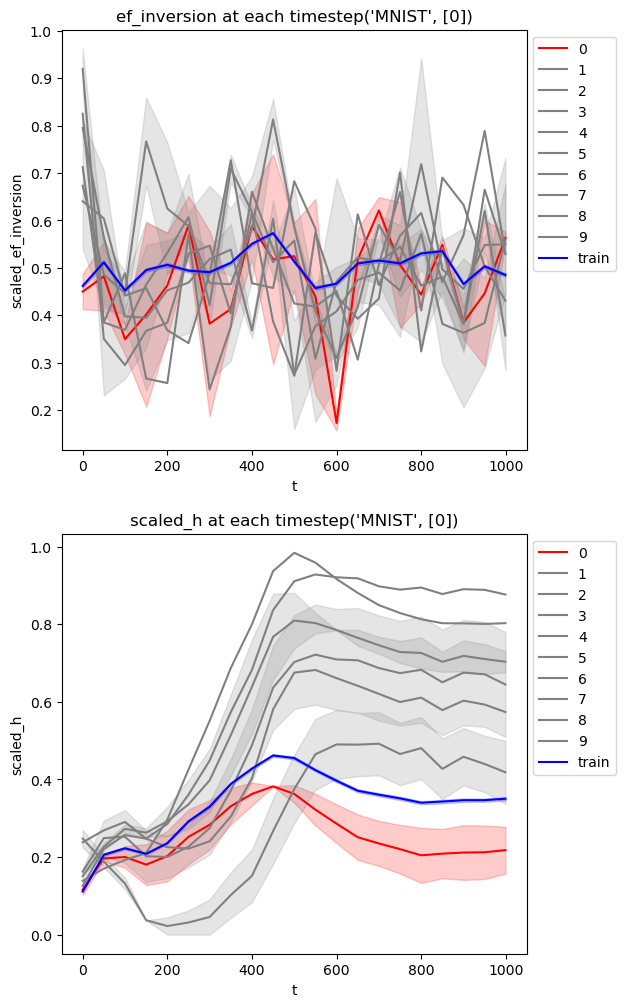

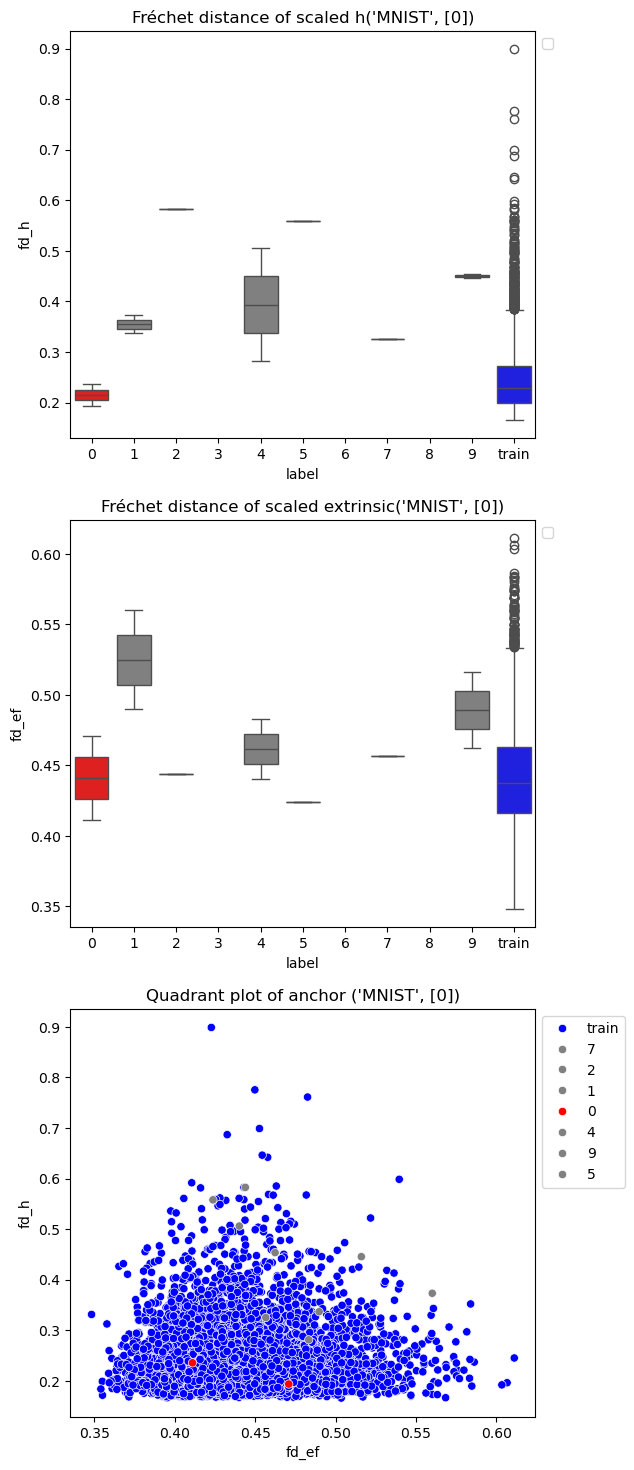

In [ ]:

"""Handle these afterward"""
#h_info_sampledImgs = sampler.load_h_information()
#xt_info_sampledImgs = sampler.load_xt_information()



expriment1 = Experiment_1(args, model_config, model, sampler, trainer)
expriment1.plot_sim()

df_anchor = expriment1.df_anchor

print("Experiment 1 Done ......")

exp2 = Experiment_2(args, model_config, df_anchor)
train_mean_anchor = exp2.anchor_train_mean_df
exp2.plot_sim()

print("experiment 2 Done ......")


# create indices
reduced_sort_idx = create_reduce_idx(args, train_mean_anchor)

for stage in range((5)):
    for rd_mode in ['HIHE', 'Other', 'Random']:
        train_new(args, reduced_sort_idx, model_config, stage, rd_mode)
print("Training reduced model Done ......")

In [7]:
args.load_different_model = True
args.load_rd_training_checkpoint = 150
modelConfig = set_config(args)

FID_HIHE = []
FID_Other = []
FID_Random = []

fid_dt_train = CUSTOM_DATASET(args, split=True)
fid_train_dataset, _ = fid_dt_train.load_dataset(custom_trasform=True)

dt_loader = DataLoader(fid_train_dataset, batch_size=args.batch_size, shuffle=False)

for dt, i in dt_loader:
    break #init dt

real = dt

for i in range(5):
    args.rd = int(i * 0.05)
    for mode in ["HIHE", 'Other', 'Random']:
        with torch.no_grad():
            device = torch.device(modelConfig["device"])
            model = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                            num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)

            """Modify in different enviornment"""
            ckpt = torch.load(os.path.join(
                modelConfig["save_weight_dir"], f'{mode}_' + modelConfig["test_load_weight"]), map_location=device)
            model.load_state_dict(ckpt)
            print("model load weight done.")
            model.eval()
            sampler = GaussianDiffusionSampler(
                model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"]).to(device)


        args.load_different_model = False

        """
        Some bugs need to be fixed here :
        sampling time became longer after training process.
        after gc.collect() still doesn't work.
        """
        with torch.no_grad():
            model.eval()
            noisyImage = torch.randn(
            size=[model_config["batch_size"], 3, 32, 32], device="cuda")
            saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)
            sampledImgs = sampler(noisyImage)
            
        fake = sampledImgs
        fretchet_dist = calculate_fretchet(real,fake,InceptionV3_model) 
        print(f'mode : {fretchet_dist}')

        if mode == "HIHE":
            FID_HIHE.append(fretchet_dist)
        if mode == "Other":
            FID_Other.append(fretchet_dist)
        if mode == "Random":
            FID_Random.append(fretchet_dist)



Config : haha


C:\Users\user\AppData\Local\Temp\ipykernel_10324\1874249941.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h space information and xt information.
Timestep 984 add to h space information and xt information.
Timestep 983 add

In [2]:
FID_HIHE = [61.054545639942404,
 62.03012659538118,
 59.896491306213846,
 56.013819815573015,
 59.144926858979034]

FID_Other = [57.43063735398056,
 52.33210991743954,
 51.464702478061156,
 51.06859096371424,
 56.26048484748637]

FID_Random = [47.766455933490775,
 48.53556220704408,
 52.80401027315199,
 48.37481486777986,
 46.849685381442995]

In [8]:
FID_HIHE

[61.054545639942404,
 62.03012659538118,
 59.896491306213846,
 56.013819815573015,
 59.144926858979034]

In [9]:
FID_Other

[57.43063735398056,
 52.33210991743954,
 51.464702478061156,
 51.06859096371424,
 56.26048484748637]

In [11]:
FID_Random

[47.766455933490775,
 48.53556220704408,
 52.80401027315199,
 48.37481486777986,
 46.849685381442995]

In [15]:
red_percentage = np.array([0, 5, 10, 15, 20]).astype(int)

FID_rec = pd.DataFrame([FID_HIHE, FID_Other, FID_Random, red_percentage]).T
FID_rec.columns = ['FID_HIHE', 'FID_Other', 'FID_Random', 'red_percentage']
df_melted = FID_rec.melt(id_vars=["red_percentage"], var_name="FID Type", value_name="FID Value")


In [16]:

df_melted

,red_percentage,FID Type,FID Value
0,0.0,FID_HIHE,61.054546
1,5.0,FID_HIHE,62.030127
2,10.0,FID_HIHE,59.896491
3,15.0,FID_HIHE,56.013820
4,20.0,FID_HIHE,59.144927
5,0.0,FID_Other,57.430637
6,5.0,FID_Other,52.332110
7,10.0,FID_Other,51.464702
8,15.0,FID_Other,51.068591
9,20.0,FID_Other,56.260485


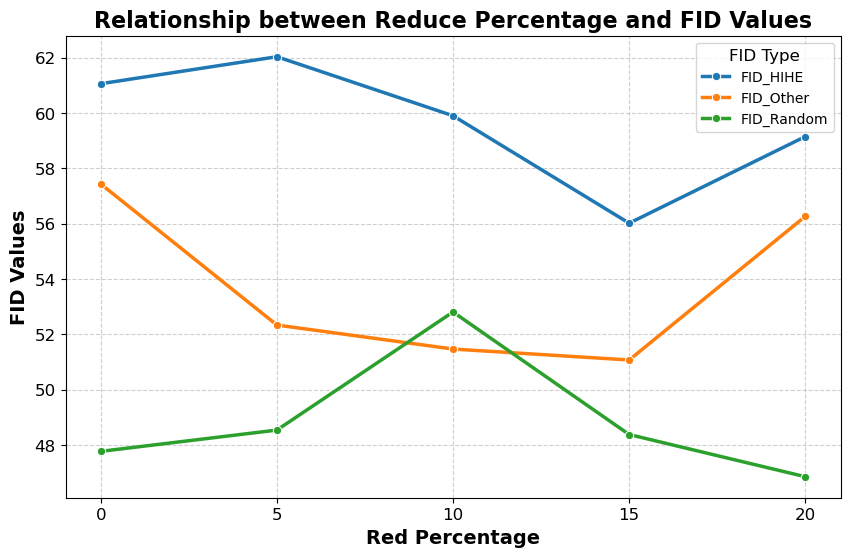

In [18]:
# Create a fancy relplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x="red_percentage", y="FID Value", hue="FID Type", marker="o", linewidth=2.5)

# Customize plot aesthetics
plt.xlabel("Red Percentage", fontsize=14, fontweight='bold')
plt.ylabel("FID Values", fontsize=14, fontweight='bold')
plt.title("Relationship between Reduce Percentage and FID Values", fontsize=16, fontweight='bold')
plt.legend(title="FID Type", title_fontsize=12, fontsize=10)
plt.xticks(red_percentage, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()



In [ ]:
#rd_model, rd_sampler, rd_trainer = model_init(args, model_config, rd=True)
#fake = generate_sameple_img(args, model_config, rd_model, rd_sampler)


"""
with torch.no_grad():
    model.eval()
    noisyImage = torch.randn(
    size=[model_config["batch_size"], 3, 32, 32], device="cuda")
    saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)
    sampledImgs = rd_sampler(noisyImage)
"""
fake = sampledImgs

fid_dt_train = CUSTOM_DATASET(args, split=True)
fid_train_dataset, _ = fid_dt_train.load_dataset(custom_trasform=True)

dt_loader = DataLoader(fid_train_dataset, batch_size=fake.shape[0], shuffle=False)

for dt, i in dt_loader:
    print(dt.shape)
    break

real = dt
fretchet_dist = calculate_fretchet(real,fake,InceptionV3_model) 

torch.Size([80, 3, 32, 32])


In [6]:
fretchet_dist

69.63400291726376

In [4]:
reduced_percentile = 0.04

dt_train = CUSTOM_DATASET(args, split=True)
train_dataset, _ = dt_train.load_dataset(custom_trasform=True)


# Align the number of each group dataset
HIHE_len = len(reduced_sort_idx) * 0.25
subset_size = int(HIHE_len * (1 - reduced_percentile * stage))  # Ensure the same size for all modes

for reduce_mode in ['HIHE', 'Other', 'Random']:
    #for round in range(10):
    if reduce_mode == 'HIHE':
        reduced_data = Subset(train_dataset, list(reduced_sort_idx[:subset_size]))
    if reduce_mode == 'Other':
        reduced_data = Subset(train_dataset, list(reduced_sort_idx[-subset_size:]))
    if reduce_mode == 'Random':
        random_indices = np.random.choice(len(reduced_sort_idx), subset_size, replace=False)
        random_indices_arr = reduced_sort_idx[random_indices]
        reduced_data = Subset(train_dataset, random_indices_arr)

NameError: name 'reduced_sort_idx' is not defined

In [30]:
len(reduced_data_h)

80

In [10]:
reduced_sort_idx

array([ 114, 2956, 2546, ..., 2816, 3405, 3293], dtype=int64)

In [7]:
train_mean_anchor

,idx,label,scaled_h,scaled_ef_inversion,fd_h,fd_ef
0,0,train,0.221093,0.507086,0.263851,0.389556
1,1,train,0.362980,0.490500,0.198949,0.355486
2,2,train,0.354381,0.485490,0.180239,0.373786
3,3,train,0.306864,0.498539,0.332577,0.380612
4,4,train,0.318964,0.465728,0.180777,0.374146
...,...,...,...,...,...,...
3996,3996,train,0.238334,0.476684,0.235583,0.476311
3997,3997,train,0.279995,0.486525,0.202313,0.392131
3998,3998,train,0.408594,0.509935,0.233167,0.394157
3999,3999,train,0.348559,0.518587,0.250119,0.398875


In [8]:
df_anchor_mean = train_mean_anchor.groupby(['idx'])[['scaled_ef_inversion','scaled_h']].mean().reset_index()
df_anchor_mean['weight'] = (df_anchor_mean['scaled_ef_inversion'] * 0.2 + df_anchor_mean['scaled_h'] * 0.8)
    
df_anchor_mean = df_anchor_mean.sort_values(by='weight')

In [9]:
df_anchor_mean

,idx,scaled_ef_inversion,scaled_h,weight
114,114,0.505249,0.052346,0.142926
2956,2956,0.502548,0.071143,0.157424
2546,2546,0.505000,0.078002,0.163402
2478,2478,0.484304,0.086181,0.165805
516,516,0.469112,0.106700,0.179182
...,...,...,...,...
1607,1607,0.500433,0.738517,0.690900
1302,1302,0.509699,0.738446,0.692696
2816,2816,0.536370,0.755207,0.711440
3405,3405,0.483142,0.818446,0.751385
